# Regressão 01 - tarefa 03 - transformações em X e Y

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import patsy

import statsmodels.api as sm

from sklearn.metrics import r2_score

import warnings
#Algumas células estavam retornando com um aviso, por isso o uso dessa biblioteca
warnings.filterwarnings('ignore', message='omni_normtest is not valid with less than 8 observations')


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [3]:
df = pd.read_csv('dataFrame.csv')
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
#item 1
formula = 'tip ~ sex + smoker + day + net_bill'


y, X = patsy.dmatrices(formula, data=df)

# Exibir a matriz y (variável dependente)
print("Matriz y (tip):")
print(y)

# Exibir a matriz X (variáveis independentes)
print("\nMatriz X (variáveis independentes):")
print(X)

Matriz y (tip):
[[1.01]
 [1.66]
 [3.5 ]
 [3.31]
 [3.61]]

Matriz X (variáveis independentes):
[[ 1.    0.   15.98]
 [ 1.    1.    8.68]
 [ 1.    1.   17.51]
 [ 1.    1.   20.37]
 [ 1.    0.   20.98]]


In [5]:
#item 2
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2.534
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.283
Time:                        19:15:05   Log-Likelihood:                -4.2858
No. Observations:                   5   AIC:                             14.57
Df Residuals:                       2   BIC:                             13.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5586      1.899     -0.821      

In [7]:
p_values = pd.Series(model.pvalues, index=X.design_info.column_names)

# Definindo um valor limitador pro p-value
p_value_threshold = 0.05

while p_values.max() > p_value_threshold:
    # Encontrar a variável com maior p-value
    variable_to_remove = p_values.idxmax()

    # Remover a variável da fórmula
    formula = formula.replace(f' + {variable_to_remove}', '')
    y, X = patsy.dmatrices(formula, data=df)

    # Ajustar o modelo novamente
    model = sm.OLS(y, X).fit()

    # Atualizar os p-values para o novo modelo
    p_values = pd.Series(model.pvalues, index=X.design_info.column_names)

    print(f"\nModelo ajustado sem a variável {variable_to_remove}:")
    print(model.summary())


Modelo ajustado sem a variável Intercept:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     2.534
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.283
Time:                        19:16:51   Log-Likelihood:                -4.2858
No. Observations:                   5   AIC:                             14.57
Df Residuals:                       2   BIC:                             13.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Interce

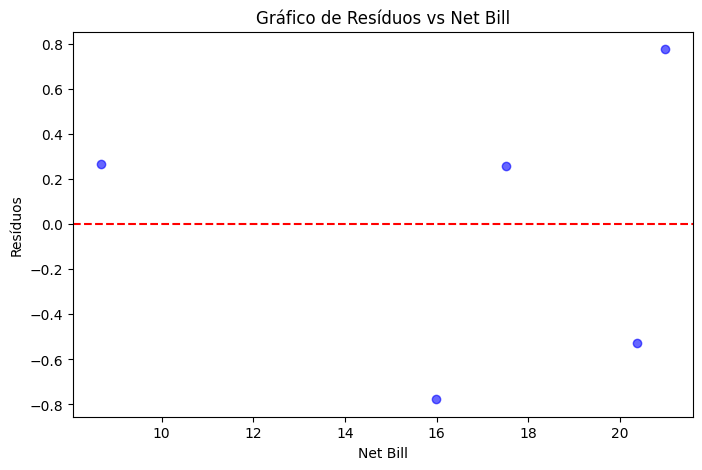

In [8]:
#item 3
residuos = model.resid

# Criando o gráfico de resíduos em função de net_bill
plt.figure(figsize=(8, 5))
plt.scatter(df['net_bill'], residuos, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title("Gráfico de Resíduos vs Net Bill")
plt.xlabel("Net Bill")
plt.ylabel("Resíduos")
plt.show()

In [11]:
#Item 4
df['log_net_bill'] = np.log(df['net_bill'])

df['net_bill_squared'] = df['net_bill'] ** 2

# Modelo 1: Usando log(net_bill)
formula_log = "tip ~ log_net_bill"
y_log, X_log = patsy.dmatrices(formula_log, data=df, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()

# Modelo 2: Usando polinômio de segundo grau
formula_poly = "tip ~ net_bill + net_bill_squared"
y_poly, X_poly = patsy.dmatrices(formula_poly, data=df, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()

# Comparando os R^2
print("Modelo com log(net_bill):")
print(model_log.summary())
print("\nModelo com polinômio de segundo grau:")
print(model_poly.summary())

Modelo com log(net_bill):
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     2.106
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.243
Time:                        19:24:32   Log-Likelihood:                -6.1123
No. Observations:                   5   AIC:                             16.22
Df Residuals:                       3   BIC:                             15.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.330

### R:
O mlehor modelo  é com polinômio de segundo grau, o qual está com R-quadrado = 0.614

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [14]:
#Item 1
df["log_tip"] = np.log(df["tip"])

# Fórmula do modelo
formula = "log_tip ~ sex + smoker + time + net_bill"

# Criando as matrizes y (variável dependente) e X (design matrix)
y, X = patsy.dmatrices(formula, data=df, return_type="dataframe")

# Exibindo as matrizes
print("Matriz y (log de tip):")
print(y.head())
print("\nMatriz X (variáveis explicativas):")
print(X.head())

Matriz y (log de tip):
    log_tip
0  0.009950
1  0.506818
2  1.252763
3  1.196948
4  1.283708

Matriz X (variáveis explicativas):
   Intercept  sex[T.Male]  net_bill
0        1.0          0.0     15.98
1        1.0          1.0      8.68
2        1.0          1.0     17.51
3        1.0          1.0     20.37
4        1.0          0.0     20.98


In [18]:
#Item 2
# Fórmula inicial
formula = "log_tip ~ sex + smoker + time + net_bill"
y, X = patsy.dmatrices(formula, data=df, return_type="dataframe")

# Ajuste inicial do modelo
model = sm.OLS(y, X).fit()

# Limitando o valor do p_value
p_value_threshold = 0.5 #Tentei com o valor de 0.05 mas demorou bastante para encontrar as variaveis
removed_variables = []

# Loop para remover variáveis não significantes
while True:
    # Obter p-values (ignorando o intercepto)
    p_values = model.pvalues.drop("Intercept", errors="ignore")

    # Verificar se há p-values acima do limite
    if p_values.max() <= p_value_threshold or len(p_values) == 0:
        break  # Interrompe o loop se todas as variáveis são significantes

    # Identificar a variável com maior p-value
    variable_to_remove = p_values.idxmax()
    removed_variables.append(variable_to_remove)

    # Remover a variável da fórmula
    terms = formula.split("~")
    predictors = terms[1].strip().split("+")
    predictors = [pred.strip() for pred in predictors if pred.strip() != variable_to_remove]
    formula = f"{terms[0].strip()} ~ {' + '.join(predictors)}"

    # Reajustar o modelo
    y, X = patsy.dmatrices(formula, data=df, return_type="dataframe")
    model = sm.OLS(y, X).fit()

# Exibir o resumo final do modelo
print("Modelo final:")
print(model.summary())

# Variáveis removidas
print("\nVariáveis removidas:")
print(removed_variables)

Modelo final:
                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     2.111
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.321
Time:                        19:29:11   Log-Likelihood:               -0.87820
No. Observations:                   5   AIC:                             7.756
Df Residuals:                       2   BIC:                             6.585
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.0604      0.961   

In [19]:
#Item 4
#Transformação logarítmica de 'net_bill'
df['log_net_bill'] = np.log(df['net_bill'])

X_poly_2 = np.column_stack([df['net_bill'], df['net_bill']**2])  # Grau 2
X_poly_3 = np.column_stack([df['net_bill'], df['net_bill']**2, df['net_bill']**3])  # Grau 3

#Ajustar os modelos
# Modelo logaritmo
X_log = sm.add_constant(df['net_bill'])  # Adicionando a constante (intercepto)
model_log = sm.OLS(df['tip'], X_log).fit()

# Modelo polinomial de grau 2
X_poly_2 = sm.add_constant(X_poly_2)  # Adicionando a constante (intercepto)
model_poly_2 = sm.OLS(df['tip'], X_poly_2).fit()

# Modelo polinomial de grau 3
X_poly_3 = sm.add_constant(X_poly_3)  # Adicionando a constante (intercepto)
model_poly_3 = sm.OLS(df['tip'], X_poly_3).fit()


#Comparar os modelos
print("Modelo Logaritmo:")
print(model_log.summary())

print("\nModelo Polinomial Grau 2:")
print(model_poly_2.summary())

print("\nModelo Polinomial Grau 3:")
print(model_poly_3.summary())


Modelo Logaritmo:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     2.745
Date:                Fri, 03 Jan 2025   Prob (F-statistic):              0.196
Time:                        19:33:35   Log-Likelihood:                -5.8172
No. Observations:                   5   AIC:                             15.63
Df Residuals:                       3   BIC:                             14.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1878      1.751  

In [21]:
predictions = model_poly_3.predict(X_poly_3)

r2 = r2_score(df['tip'], predictions)
print(f'R² na escala de "tip": {r2}')

R² na escala de "tip": 0.8864119059679634


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [23]:
novo_df = pd.read_csv('previsao_de_renda.csv')
novo_df

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,16006,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,14996,2016-03-01,3722,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,14997,2016-03-01,6194,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,14998,2016-03-01,4922,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


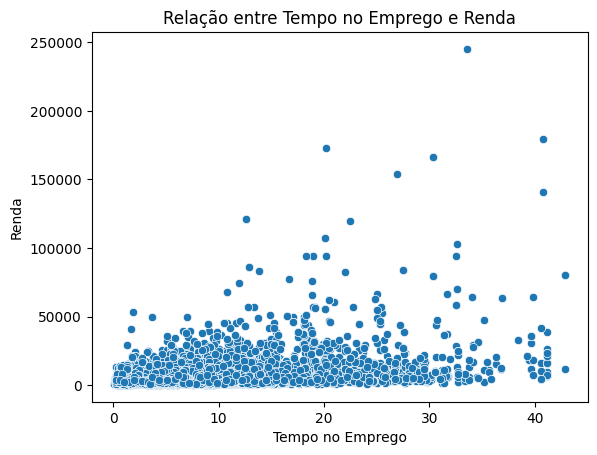

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Fri, 03 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:40:30   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2177.9041    112.212     19.409

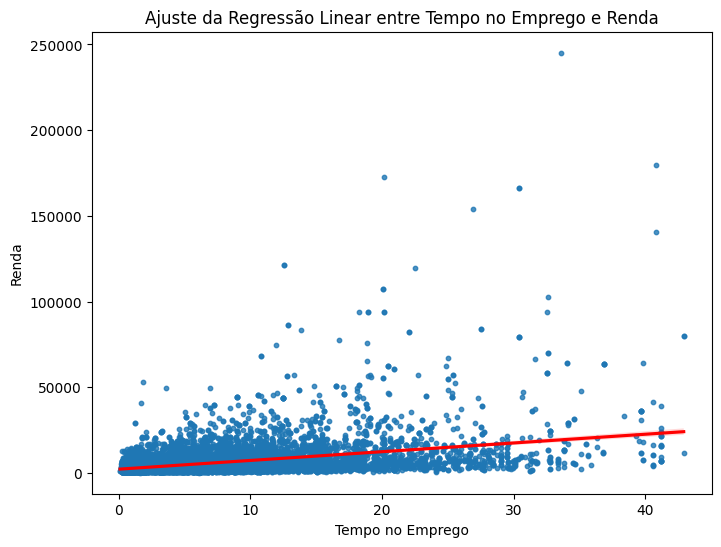

In [24]:
#Item 1
#Verificar valores ausentes
novo_df = novo_df.dropna(subset=['renda', 'tempo_emprego'])

#Visualizar a relação entre as variáveis
sns.scatterplot(x='tempo_emprego', y='renda', data=novo_df)
plt.xlabel('Tempo no Emprego')
plt.ylabel('Renda')
plt.title('Relação entre Tempo no Emprego e Renda')
plt.show()

#Preparar as variáveis para o modelo
X = novo_df['tempo_emprego']
y = novo_df['renda']

#Adicionar constante para o intercepto
X = sm.add_constant(X)

#Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

#Exibir o resumo do modelo
print(modelo.summary())

#Plotar a linha de regressão
plt.figure(figsize=(8, 6))
sns.regplot(x='tempo_emprego', y='renda', data=novo_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Tempo no Emprego')
plt.ylabel('Renda')
plt.title('Ajuste da Regressão Linear entre Tempo no Emprego e Renda')
plt.show()

### R:
Analisando a regressão é notável que o baixo valor de R² sugere que o modelo não está explicando bem a variação de renda. Variáveis como idade, educacao, ou tipo_renda podem melhorar a explicação da variabilidade da renda, por tanto para melhorar a regressão eu as adicionaria na análise.

In [31]:
#Item 4
novo_df['renda'] = pd.to_numeric(novo_df['renda'], errors='coerce')
# Caso existam NaNs
novo_df = novo_df.dropna(subset=['renda'])


novo_df['log_renda'] = np.log(novo_df['renda'])

X = novo_df[['tempo_emprego', 'idade', 'qtd_filhos', 'sexo', 'posse_de_veiculo',
             'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia',
             'qt_pessoas_residencia']]

y = novo_df['log_renda']

X_dummies = pd.get_dummies(X, drop_first=True)
X_dummies = X_dummies.astype(int)
X_dummies = sm.add_constant(X_dummies)

y = pd.to_numeric(y, errors='coerce')

modelo = sm.OLS(y, X_dummies).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     285.5
Date:                Fri, 03 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:50:23   Log-Likelihood:                -13583.
No. Observations:               12427   AIC:                         2.722e+04
Df Residuals:                   12402   BIC:                         2.740e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Item 5
### R:
O modelo de regressão tem um R-quadrado de 35.6%, isso explica parte da variação da renda.

Algumas variáveis são significativas, como tempo_emprego, idade e sexo_M, enquanto outras não são, o que foi essencial para o ajuste e a melhora do modelo!